Polynomial 
Regression with SciKit-Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Sample Data

In [2]:
df = pd.read_csv("C:\\Users\\Ravi Nadageri\\Desktop\\Py_Practice _file\\ML_models\\basic_Linear_regression\\Advertising.csv")

In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
X = df.drop('sales',axis=1)

In [13]:
y=df.sales

Multiple Features (N-Dimensional) lets review

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly_coverter = PolynomialFeatures(degree=3,include_bias=False)

In [16]:
poly_feauter = poly_coverter.fit_transform(X)

In [17]:
X.shape

(200, 3)

In [18]:
poly_feauter.shape

(200, 19)

Train | Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# random_state:
X_train, X_test, y_train, y_test = train_test_split(poly_feauter, y, test_size=0.3, random_state=101)

In [22]:
X_train.shape

(140, 19)

In [23]:
from sklearn.preprocessing import StandardScaler

Create a instance

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train = scaler.transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [30]:
poly_feauter[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

Regularization

# L2 Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridge_model = Ridge(alpha=10)

In [35]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [37]:
test_predictions = ridge_model.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
MAE = mean_absolute_error(y_test,test_predictions)
print(' MAE - ',MAE)

 MAE -  0.5774404204714166


In [41]:
MSE = mean_squared_error(y_test,test_predictions)
print('MSE - ', MSE)

RMSE = np.sqrt(MSE)
print('RMSE ', RMSE)

MSE -  0.8003783071528348
RMSE  0.8946386461319648


Cross validation 

In [42]:
from sklearn.linear_model import RidgeCV

In [44]:
RidgeCV_model = RidgeCV(alphas=(0.1,1.0,10.0))

In [45]:
RidgeCV_model.fit(X_train,y_train)

RidgeCV()

In [47]:
RidgeCV_model.alpha_

0.1

In [46]:
from sklearn.metrics import SCORERS

In [21]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

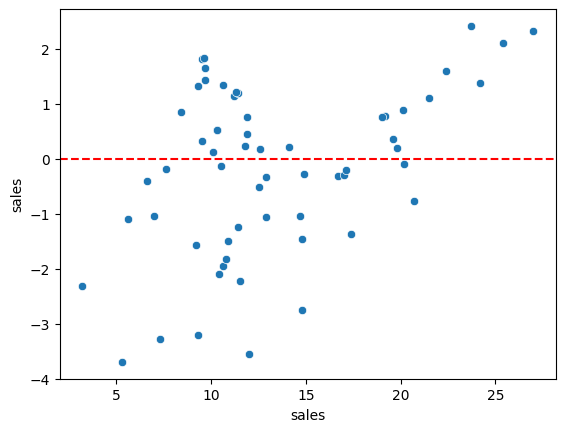

In [22]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [23]:
len(test_res)

60

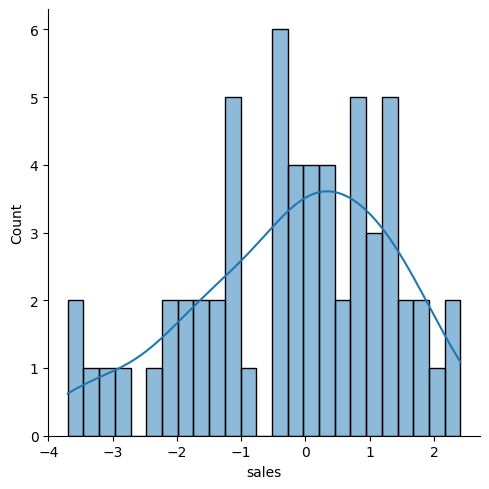

In [24]:
sns.displot(test_res,bins=25,kde=True)

# Polynomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly = PolynomialFeatures(degree=2,include_bias=False)


In [39]:
poly.fit(X) #we will fit on original X data set

PolynomialFeatures(include_bias=False)

In [40]:
poly.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [41]:
poly.transform(X)[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [42]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [43]:
polyf = poly.transform(X)

In [44]:
polyf.shape

(200, 9)

In [47]:
polyf = poly.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split

Remember here we have to pass the new created feature which is polyf instad of X

In [49]:
X_train, X_test, y_train, y_test = train_test_split(polyf, y, test_size=0.3, random_state=101)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train,y_train)

LinearRegression()

In [53]:
test_predictions=model.predict(X_test)

In [54]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [57]:
mae = mean_squared_error(y_test,test_predictions)

In [58]:
mse = mean_squared_error(y_test,test_predictions)

In [59]:
mae

0.44175055104033895

In [60]:
mse

0.44175055104033895

In [61]:
rmse = np.sqrt(mse)
rmse

0.6646431757269

### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

so we are getting better result than standerd Linear Regression model 

Adjusting Parameters

Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [64]:
train_rmse_error = []
test_rmse_error = []


for d in range(1,10):
    poly = PolynomialFeatures(degree=d,include_bias=False)
    polyf = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(polyf, y, test_size=0.3, random_state=101)


    model = LinearRegression()
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)



In [65]:
train_rmse_error

[1.734594124329376,
 0.5879574085292234,
 0.43393443569020657,
 0.35170836883993556,
 0.2509342923789987,
 0.19399757603273932,
 5.421982503302247,
 0.1519554915781105,
 0.17181489440322673]

In [66]:
test_rmse_error

[1.5161519375993877,
 0.6646431757269,
 0.5803286825219469,
 0.5077742640851456,
 2.575819388953378,
 4.319765294961401,
 1378.531526416359,
 3090.516288100603,
 96216.91641765335]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


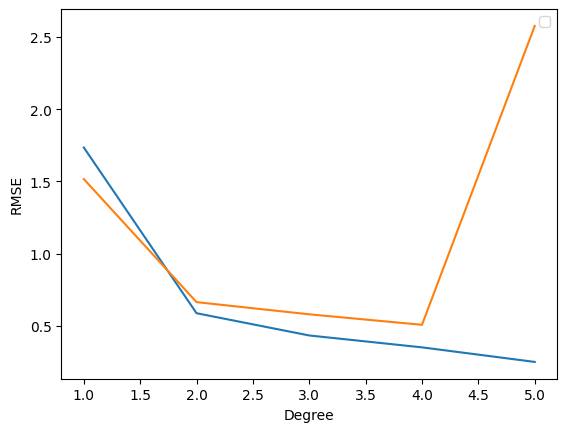

In [73]:
plt.plot(range(1,6),train_rmse_error[:5])
plt.plot(range(1,6),test_rmse_error[:5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
plt.plot(range(1,10),train_rmse_error)
plt.plot(range(1,10),test_rmse_error)
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()

## Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [74]:
final_poly = PolynomialFeatures(degree=3,include_bias=False)

In [76]:
final_model = LinearRegression()

In [77]:
full_converted_X = final_poly.fit_transform(X)

full_converted_X

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

In [78]:
final_model.fit(full_converted_X,y)

LinearRegression()

In [80]:
from joblib import load, dump

In [85]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [89]:
dump(final_poly,'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [90]:
final_loaded=load('final_poly_converter.joblib')

In [91]:
loaded_model = load('final_poly_model.joblib')

lets test the model 

In [92]:
campaign = [[149,22,12]]

In [94]:
transformed_data = final_loaded.fit_transform(campaign)

transformed_data

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [96]:
loaded_model.predict(transformed_data)

array([14.64501014])

So this way we can setup the model